In [126]:
import numpy as np
import scipy as sp
from scipy import constants as c
from scipy import sparse as sparse
from matplotlib import pyplot as plt
import scipy.linalg as ln
from scipy.sparse import linalg as lnsp

In [90]:
energies = np.linspace(1e-10, 0.258, 1000)
L = 10*c.nano
U = np.array([0, 0.1, -0.5])
m =  np.array([0.3, 0.1, 0.3])

k0 = np.sqrt(2*c.m_e*m/c.hbar**2+0j)
T = []
for E in energies:
    k = k0 * np.sqrt((E - U +0j)*c.e)
    n = 4*k[1]*k[0]*np.exp(-1j*k[2]*L)
    d = (k[1]+k[0])*(k[1]+k[2])*np.exp(-1j*k[1]*L) - (k[1]-k[0])*(k[1]-k[2])*np.exp(1j*k[1]*L)
    t = n/d
    T.append((t* t.conj()).real)
T = np.array(T)

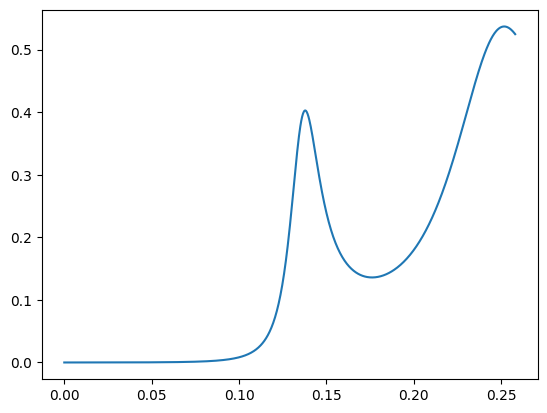

In [91]:
plt.plot(energies, T)


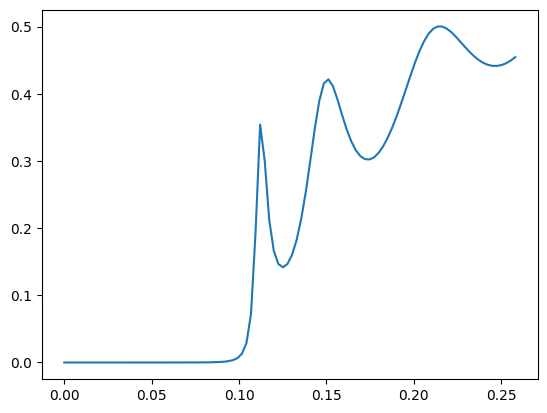

In [83]:
plt.plot(energies, T)

In [148]:
energies = np.linspace(1e-10, 0.258, 1000).reshape(-1,1)
L = 10*c.nano
U = np.array([0, 0.1, -0.5])
m =  np.array([0.3, 0.1, 0.3])

k = np.sqrt(2*c.m_e*m/c.hbar**2+0j) * np.sqrt((energies - U +0j)*c.e)
k = k.T
n = 4*k[1]*k[0]*np.exp(-1j*k[2]*L)
d = (k[1]+k[0])*(k[1]+k[2])*np.exp(-1j*k[1]*L) - (k[1]-k[0])*(k[1]-k[2])*np.exp(1j*k[1]*L)
t = n/d
T = (t* t.conj()).real


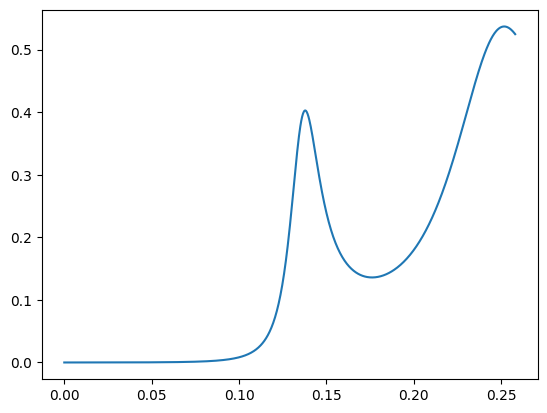

In [108]:
plt.plot(energies, T)


In [156]:
"""" 4) Creating the Hamiltonian """

n_points = 100
sigma0=5.0
k0 = 1.0
x0 = -150.0
x_begin = -5.0
x_end = 15
L = 10.0
barrier_width = 3.0
x, dx = np.linspace(x_begin, x_end, n_points, retstep=True)
potential = np.array(
            [U[1] if 0.0 < X < L else (U[0] if X<0 else U[2]) for X in x])
mass = np.array(
            [m[1] if 0.0 < X < L*c.nano else (m[0] if X<0 else m[2]) for X in x])
h_diag = np.ones(n_points) / dx**2 + potential
h_non_diag = np.ones(n_points - 1) * (-0.5 / dx**2)
hamiltonian = sparse.diags([h_diag, h_non_diag, h_non_diag], [0, 1, -1])

In [160]:
w, v = lnsp.eigs(hamiltonian.tocsc(), which='SM')

/home/shadman/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


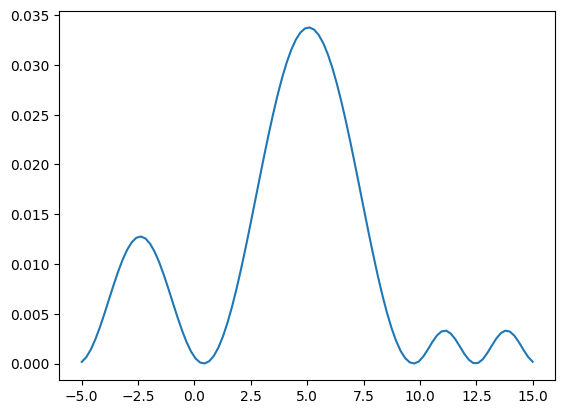

In [161]:
plt.plot(x, (v.T[3] * v.T[3].conj()))

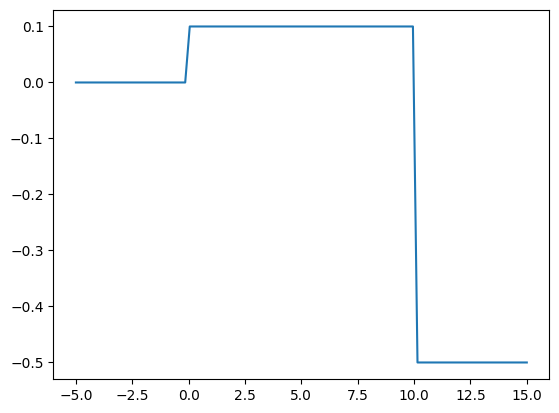

In [136]:
plt.plot(x,potential)

In [141]:
w.real

array([-0.36777022, -0.00401558,  0.07969555,  0.15689737,  0.26210489,
        0.38815934])

In [164]:
n_points = 100
sigma0=5.0
k0 = 1.0
x0 = -150.0
x_begin = -5.0
x_end = 15
L = 10.0
barrier_width = 3.0
x, dx = np.linspace(x_begin*c.nano, x_end*c.nano, n_points, retstep=True)
potential = np.array(
            [U[1] if 0.0 < X < L*c.nano else (U[0] if X<0 else U[2]) for X in x])
mass = np.array(
            [m[1] if 0.0 < X < L*c.nano else (m[0] if X<0 else m[2]) for X in x])
h_diag = c.hbar**2 /(2*c.m_e*mass) * np.ones(n_points) / dx**2 + potential*c.e
h_non_diag = c.hbar**2 /(2*c.m_e*mass[1:]) * np.ones(n_points - 1) * (-0.5 / dx**2)
hamiltonian = sparse.diags([h_diag, h_non_diag, h_non_diag], [0, 1, -1])



In [170]:
w, v = lnsp.eigs(hamiltonian.tocsc(), which='SM')

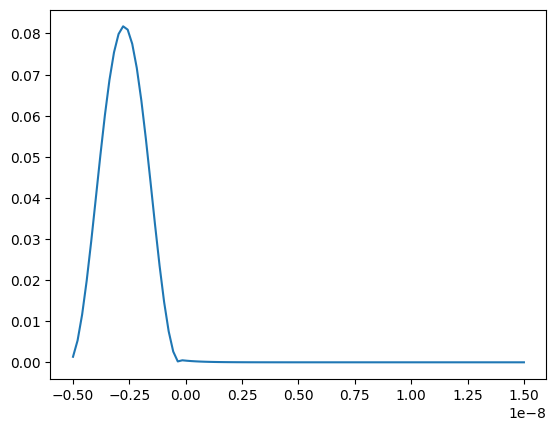

In [174]:
plt.plot(x, (v.T[1] * v.T[1].conj()))

In [172]:
w/c.e

array([-0.15226382+0.j,  0.02576176+0.j,  0.03616909+0.j,  0.11889723+0.j,
        0.10171829+0.j,  0.1733815 +0.j])

In [168]:
potential

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5])